# Data Engineering
`Donwloading and creating the dataset for the LyricsGenerator task.`

**Project Repository:** https://github.com/Tr33Bug/ML-NLP-LyricsGen-Transformer

Ressources:
- https://ruder.io/recent-advances-lm-fine-tuning/
- https://towardsdatascience.com/how-to-fine-tune-gpt-2-for-text-generation-ae2ea53bc272
- http://jalammar.github.io/illustrated-gpt2/

## Notebook Setup


In [1]:
# installation: 
! pip install lyricsgenius
! pip install pandas
! pip install regex
! pip install matplotlib

In [2]:
# imports and setup
import lyricsgenius
import os
import pandas as pd
import regex as re
import matplotlib.pyplot as plt

In [3]:
#### FILE PATHS
# root path
root = './'

# dataset from spotify list (deprecated)
geniusDataset = root + 'datasets/genius/'
geniusCleanDataset = root + 'datasets/geniusClean/'

# dataset from IMDP Top 100 Rap Artists
geniusTopRapIMDB = root + 'datasets/geniusTopRapIMDB/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'

# dataset from IMDP top 100 artists all time and top 21th century artists
geniusTopIMDB = root + 'datasets/geniusTopIMDB/'
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'

# API token path
tokenPath = root + 'geniusToken.txt'


## Setup API-Connection

Using: 
- the Genius API from genius.com (https://docs.genius.com/#/getting-started-h1)
- the LyricsGenius-Framework (https://github.com/johnwmillr/LyricsGenius)
---

In [4]:
# Genius API Access Token
# get token at: https://genius.com/api-clients
# load token from file
with open(tokenPath, 'r') as file:
    GENIUS_ACCESS_TOKEN = str(file.read())

    # delete last newline character from token
    # GENIUS_ACCESS_TOKEN = GENIUS_ACCESS_TOKEN[:-1]
    file.close()

print(GENIUS_ACCESS_TOKEN)

MWsM24sb6E35T_zgNTSHtAr1U9fmSJj2DU5G1BU6bbUjezqStqNMIStlLIL7VU5b


In [5]:
# test connection'
genius = lyricsgenius.Genius(GENIUS_ACCESS_TOKEN)

# remove headers like [Intro], [Chorus], [Verse 1], etc.
genius.remove_section_headers = True

In [21]:
# function to save every song to one file
def writeSongToFile(artist):
    for song in artist.songs:
        # save song in a file called artistname-songname.txt
        song.save_lyrics(filename='Lyrics_' + song.artist + '_' + song.title, extension='txt', verbose=True)


In [22]:
# function to move all files starting with 'Lyrics_' to path
def moveLyricsFiles(fromPath, toPath):
    for filename in os.listdir(fromPath):
        if filename.startswith('Lyrics_'):
            os.rename(filename, toPath + filename)


### Test API-Connetction

In [9]:
# test connection with Colplay as example
artist = genius.search_artist("Coldplay", max_songs=2, sort="popularity")
print(artist.songs)

Searching for songs by Coldplay...

Song 1: "Viva la Vida"


Timeout: Request timed out:
HTTPSConnectionPool(host='genius.com', port=443): Read timed out. (read timeout=5)

In [19]:
# print lyrics of first song from example
print(artist.songs[0].lyrics)

Translationsहिन्दीTürkçeEspañolPortuguêsDeutschFrançaisViva la Vida Lyrics[Verse 1: Chris Martin]
I used to rule the world
Seas would rise when I gave the word
Now in the morning, I sleep alone
Sweep the streets I used to own

[Interlude]

[Verse 2: Chris Martin]
I used to roll the dice
Feel the fear in my enemies' eyes
Listen as the crowd would sing
"Now the old king is dead, long live the king"
One minute, I held the key
Next, the walls were closed on me
And I discovered that my castles stand
Upon pillars of salt and pillars of sand
[Chorus: Chris Martin]
I hear Jerusalem bells a-ringin'
Roman cavalry choirs are singin'
Be my mirror, my sword and shield
My missionaries in a foreign field
For some reason I can't explain
Once you'd gone, there was never
Never an honest word
And that was when I ruled the world

[Interlude]

[Verse 3: Chris Martin]
It was the wicked and wild wind
Blew down the doors to let me in
Shattered windows and the sound of drums
People couldn't believe what I'd be

In [20]:
# test writing lyrics to file function for example
#writeSongToFile(artist)

In [21]:
# test moving lyrics files to dataset folder for example
#moveLyricsFiles(root, geniusDataset)

## Create Artist Lists

Ressources:
- Top 49 20th Century: https://www.imdb.com/list/ls058480497/
- Top 100 AllTime: https://www.imdb.com/list/ls064818015/
- Top Rapper: https://www.imdb.com/list/ls054191097/
- Spotify Dataset: https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021 **(deprected)**
---

In [23]:
# load csv to dataframe
# df = pd.read_csv(root + 'datasets/spotify_dataset.csv')

# list of top musicians from IMDB
df_top49 = pd.read_csv(root + 'datasets/Top100GreatestMusicArtistsofAll-TimeIMDB.csv')
df_top20s = pd.read_csv(root + 'datasets/Top100GreatestMusiciansSincethe20thCenturyIMDB.csv')
df_topRap = pd.read_csv(root + 'datasets/Top100rappersIMDB.csv')

# create list of all dataframes
df_list = [df_top49, df_top20s, df_topRap]

In [8]:

for df in df_list:
    # sort all dataframe by Name
    df.sort_values(by=['Name'], inplace=True, ascending=True)

    # remove all rows except for the Name
    df.drop(df.columns.difference(['Name']), 1, inplace=True)

    # print len of dataframes
    print(len(df))

49
100
100


/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_82230/3590710727.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop(df.columns.difference(['Name']), 1, inplace=True)


In [9]:
df_top20s.head()

,Name
62,AC/DC
54,Aerosmith
36,Alice Cooper
97,Amy Winehouse
79,Anthrax


In [10]:
df_top49.head()

,Name
22,AC/DC
25,Aretha Franklin
47,Beyoncé
6,Bob Dylan
9,Bob Marley


In [11]:
df_topRap.head()

,Name
31,50 Cent
39,AZ
10,André 3000
54,Anthony 'Treach' Criss
46,Beanie Sigel


In [12]:
#### MERGE TOP 49 AND TOP 20s INTO ONE DATAFRAME topArtists
# get all Names from df_top49 and df_top20s in a list
names_top49 = df_top49['Name'].tolist()
names_top20s = df_top20s['Name'].tolist()

# merge both lists
topArtistsList = names_top49 + names_top20s
topRapper = df_topRap['Name'].tolist()

# remove duplicates
topArtistsList = list(dict.fromkeys(topArtistsList))

# print(topArtistsList)
# print(len(topArtistsList))

In [13]:

#### GENEREATE TOP 100 RAPPER LIST
# delete all entries from topRapper that are also in topArtistsList
topRapper = [x for x in topRapper if x not in topArtistsList]

# sort list
topRapper.sort()

# generate topRapper list
topRapper = list(filter(None, topRapper))

# remove whitespaces from start and end of strings
topRapper = [x.strip() for x in topRapper]

# print(topRapper)
print(len(topRapper))

93


In [14]:
# print total number of Artists 
print('Total number of Artists is:', len(topArtistsList) + len(topRapper))

Total number of Artists is: 201


## Generate Dataset

using:
- top 100 Artists from streaming numbers extracted from:
    - https://www.kaggle.com/datasets/sashankpillai/spotify-top-200-charts-20202021
- getting 20 songs from every artist
    - getting it from genius.com with lyricsgenius
        - https://github.com/johnwmillr/LyricsGenius
    - sortet after popularity
- writing a txt file for every artist and saving it to 'datasets/genius/'
---

In [15]:
# constants
NUM_SONGS = 50
LIST_TO_USE = 'Top' # 'Top' or 'Rap'

In [16]:
# lists to get songs from
print(len(topArtistsList))
print(len(topRapper))

108
93


In [17]:
# define list to use with genius api
if LIST_TO_USE == 'Top':
    artistList = topArtistsList
elif LIST_TO_USE == 'Rap':
    artistList = topRapper
else:
    print('Error: LIST_TO_USE not set correctly')

print('Current list:', LIST_TO_USE, '\nLen:', len(artistList))




Current list: Top 
Len: 108


In [18]:
# sort list alphabetically
artistList.sort()

# write top artists to file
with open(root + 'datasets/topArtists.txt', 'w') as f:
    for item in artistList:
        f.write("%s\n" % item)

# insert new line for every ',' in file topArtists.txt
with open(root + 'datasets/topArtists.txt', 'r') as f:
    lines = f.readlines()
    for i in range(len(lines)):
        lines[i] = lines[i].replace(',', '\n')
    with open(root + 'datasets/topArtists.txt', 'w') as f:
        f.writelines(lines)
f.close()



In [19]:
# read top artists from file
with open(root + 'datasets/topArtists.txt', 'r') as f:
    artistList = f.read().split('\n')

# remove empty strings from list
artistList = list(filter(None, artistList))

# remove whitespaces from start and end of strings
artistList = [x.strip() for x in artistList]

# remove duplicates
artistList = list(dict.fromkeys(artistList))


# print every artist from list 
#for artist in artistList:
#    print(artist)
    
print(len(artistList))



108


In [25]:
import time

# get lyrics for top artists
artistFile = []
for person in artistList:
    print(person)
    for i in range(10):
        try:
            artistFile = genius.search_artist(person, max_songs=NUM_SONGS, sort="popularity")
            # artistFile.save_lyrics(extension='txt', verbose=True)
            # if songs found, write to file
            if artistFile.songs:
                writeSongToFile(artistFile)
            else:
                print('No songs found for ' + person)
            break
        except:
            time.sleep(2)
            print('Error with:', person,'Got:', artistFile)

Anthrax
Searching for songs by Anthrax...

Song 1: "Caught in a Mosh"
Song 2: "Indians"
Song 3: "Madhouse"
Song 4: "I’m the Man"
Song 5: "Among the Living"
Song 6: "I Am the Law"
Error with: Anthrax Got: []
Searching for songs by Anthrax...

Song 1: "Caught in a Mosh"
Song 2: "Indians"
Song 3: "Madhouse"
Song 4: "I’m the Man"
Song 5: "Among the Living"
Song 6: "I Am the Law"
Song 7: "Got the Time"
Song 8: "Efilnikufesin (N.F.L.)"
Song 9: "Antisocial"
Song 10: "A.I.R."
Song 11: "Keep It in the Family"
Song 12: "Medusa"
Song 13: "A Skeleton in the Closet"
Song 14: "Be All, End All"
Song 15: "Only"
Song 16: "Belly of the Beast"
Song 17: "Lone Justice"
Song 18: "In the End"
Song 19: "Armed and Dangerous"
Song 20: "A.D.I. / Horror of It All"
Song 21: "Time"
Song 22: "Imitation of Life"
Song 23: "Now It’s Dark"
Song 24: "In My World"
Song 25: "One World"
Song 26: "Blood Eagle Wings"
Song 27: "Intro to Reality"
Song 28: "Breathing Lightning"
Song 29: "Safe Home"
Song 30: "The Devil You Know"


In [24]:
# define dataset path depending on list used
if LIST_TO_USE == 'Top':
    datasetPath = geniusTopIMDB
elif LIST_TO_USE == 'Rap':
    datasetPath = geniusTopRapIMDB
else:
    print('Error: LIST_TO_USE not set correctly')

# move lyrics files to geniusDataset
moveLyricsFiles(root, datasetPath)

In [ ]:
# get number of files in geniusDataset
print('GeniusTopRap:', len(os.listdir(geniusTopRapIMDB)))
print('GeniusTop:',len(os.listdir(geniusTopIMDB)))

print('Genius:', len(os.listdir(geniusDataset)))
print('GeniusClean:', len(os.listdir(geniusCleanDataset)))



GeniusTopRap: 724
GeniusTop: 801
Genius: 0
GeniusClean: 48


## Cleaning Dataset

what to delete:
- all non englisch artists
- `워`
- `Translations`... to `\n`
- all non english characters
- `()` --> Replace with whitespace
- all between `[]`
- number+`Embed`... to `\n`
- `like2Embed` to `\n`

--> delete all non english files manual

In [25]:
# define dataset paths
geniusTopIMDBClean = root + 'datasets/geniusTopIMDBClean/'
geniusTopRapIMDBClean = root + 'datasets/geniusTopRapIMDBClean/'
geniusCleanDataset = root + 'datasets/geniusClean/'

In [26]:
# define function to delete al 워 from a txt file from directory path
def cleanFiles(path):
    for filename in os.listdir(path):
        if filename.endswith('.txt'):
            with open(path + filename, 'r') as f:
                text = f.read()
                # insert new line at end of text
                text = text + '\n'
                text = text.replace('워', '')
                text = text.replace('(', ' ')
                text = text.replace(')', ' ')
                # delete all between []
                text = re.sub(r'\[.*?\]', '', text)
                # delete all number + 'Embed' to \n
                text = re.sub(r'\d*Embed.*?\n', '', text)
                # delete all from 'Translations' to \n
                text = re.sub(r'Translations*?\n', '', text)
                # delete all chinese characters
                text = re.sub(r'[\u4e00-\u9fff]+', '', text)
                # delete all non english characters
                text = re.sub(r'[^a-zA-Z0-9\s]', '', text)
                # delete all empty lines except the last in the file
                text = re.sub(r'(?m)^\s*?\n', '', text)
                # delete all whitespace in front of a line
                text = re.sub(r'(?m)^\s+', '', text)

                # get songname from filename
                try:
                    songname = filename.split('_')[2]
                except:
                    songname = filename


                # delete .txt from songname
                songname = songname.replace('.txt', '')
                
                
                # delete songtext + Lyrics from textfile
                text = text.replace(songname + ' Lyrics', '')

            
                text = text.replace('You might also likeEmbed', '')
                text = text.replace('Embed\n', '\n')
                text = text.replace('You might also like', '\n')

            with open(path + filename, 'w') as f:
                f.write(text)
            
    print('✅ --> Cleaning', path, 'done!')


In [27]:
# run function to clean files on clean folders
cleanFiles(geniusTopIMDBClean)
cleanFiles(geniusTopRapIMDBClean)
cleanFiles(geniusCleanDataset)

✅ --> Cleaning ./datasets/geniusTopIMDBClean/ done!
✅ --> Cleaning ./datasets/geniusTopRapIMDBClean/ done!
✅ --> Cleaning ./datasets/geniusClean/ done!


## Explore datasets


Creating dataframe from folders and exploring them

--- 

### Load datasets from file

In [28]:
def createDfFromFiles(path):

    # delete '.' from path, if path is relative with '.' in beginning
    if path.startswith('./'):
        path = path[1:]
    

    # make the path from current directory and the input path
    pathComp = os.getcwd() + path

    # create a tuple from files in path dataset with the file name and the file content, with latin-1 encoding
    files = [(file, open(pathComp + file, 'r', encoding='latin-1').read()) for file in os.listdir(pathComp)]

    # delete all .txt from filename
    files = [(file.replace('.txt', ''), content) for file, content in files]

    # delete all Lyrics_ from filename
    files = [(file.replace('Lyrics_', ''), content) for file, content in files]

    # replace all \n with space
    files = [(file, content.replace('\n', ' ')) for file, content in files]

    # replace all double spaces with single space
    files = [(file, content.replace('  ', ' ')) for file, content in files]

    # delete all spaces at the beginning of the string
    files = [(file, content.lstrip()) for file, content in files]

    # create a dataframe from the tuple
    df = pd.DataFrame(files, columns=['Artist', 'Lyrics'])

    # split artist name into artist and song devided by _
    df[['Artist', 'Song']] = df.Artist.str.split("_", expand=True)

    # rearrange colums to artist, song, lyrics
    df = df[['Artist', 'Song', 'Lyrics']]
    

    print('✅ --> Creating dataframe from', path, 'done!')
    return df

In [29]:
df_top = createDfFromFiles(geniusTopIMDBClean)
df_top.head()

✅ --> Creating dataframe from /datasets/geniusTopIMDBClean/ done!


,Artist,Song,Lyrics
0,Megadeth,À Tout le Monde,Tout le Monde Lyrics Dont remember where I was...
1,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
2,Black Sabbath,Children of the Grave,Revolution in their minds The children start t...
3,JAYZ,Heaven,TranslationsJAYZ Heaven ft Justin Timberlake ...
4,Eminem,Believe,And I started from the bottom Like a snowmangr...


In [30]:
df_rap = createDfFromFiles(geniusTopRapIMDBClean)
df_rap.head()

✅ --> Creating dataframe from /datasets/geniusTopRapIMDBClean/ done!


,Artist,Song,Lyrics
0,50 Cent,Ill Still Kill,Oh dont even look at me wrong when I come thro...
1,Iggy Azalea,The Last Song,Can I help you You wanna buy some ignorant art...
2,Killer Mike,JoJos Chillin,This album was created entirely by Jaime and M...
3,Busta Rhymes,Holla,Yeah yeah This shit sound like One two oclock ...
4,Gucci Mane,BiPolar,Ahh ggot it on Smash OG Parker go Bipolar brr ...


### Describe datasets

In [31]:
df_top.describe()

,Artist,Song,Lyrics
count,3101,3101,3101
unique,63,3006,3081
top,Megadeth,Angel,
freq,50,5,20


In [32]:
df_rap.describe()

,Artist,Song,Lyrics
count,2750,2750,2750
unique,58,2661,2750
top,50 Cent,Intro,Oh dont even look at me wrong when I come thro...
freq,50,8,1


### Explore datasets

In [33]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


In [34]:
# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))
print('total:', len(df_top['Artist'].unique()) + len(df_rap['Artist'].unique()))


df_top: 63
df_rap: 58
total: 121


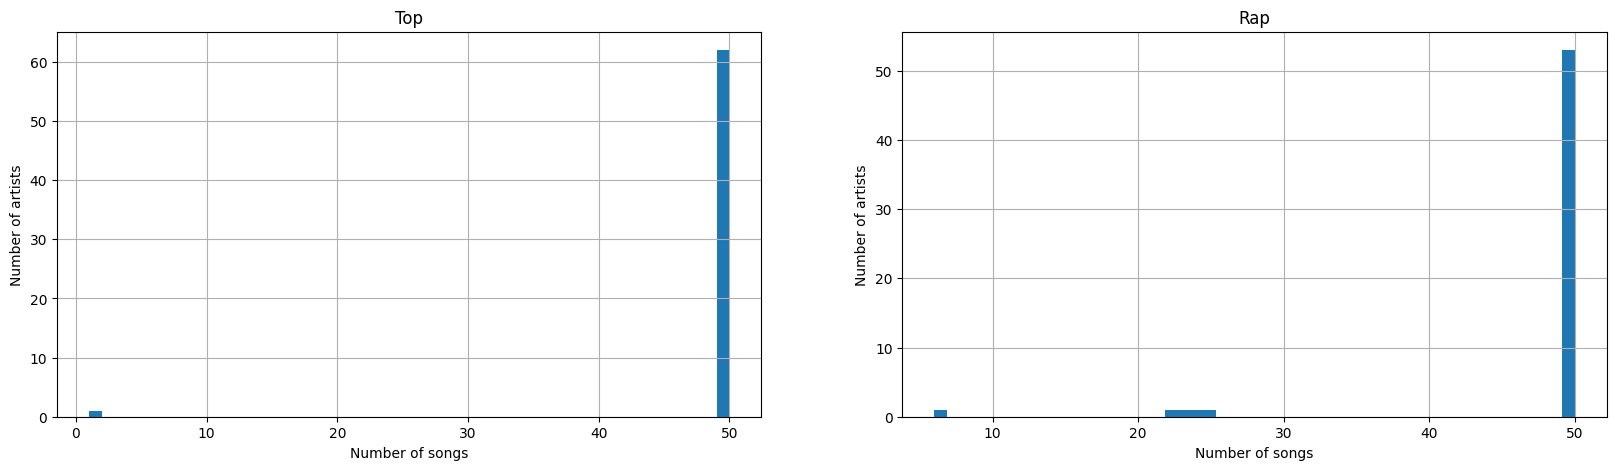

In [35]:
# plot number of songs per artists and name where artist has less than 50 songs for df_top and df_rap in a subplot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5))
df_top.groupby('Artist').count()['Song'].hist(bins=50, ax=ax1)
ax1.set_title('Top')
ax1.set_xlabel('Number of songs')
ax1.set_ylabel('Number of artists')
df_rap.groupby('Artist').count()['Song'].hist(bins=50, ax=ax2)
ax2.set_title('Rap')
ax2.set_xlabel('Number of songs')
ax2.set_ylabel('Number of artists')
plt.show()

In [36]:
# print names of artists with less than 50 songs
less50 = []
# for each artist in df_top append artist name and number of songs to less50 if number of songs is less than 50
for artist in df_top['Artist'].unique():
    if len(df_top[df_top['Artist'] == artist]) < 50:
        less50.append((artist, len(df_top[df_top['Artist'] == artist])))

for artist in df_rap['Artist'].unique():
    if len(df_rap[df_rap['Artist'] == artist]) < 50:
        less50.append((artist, len(df_rap[df_rap['Artist'] == artist])))

print(len(less50))

# print less50 artists with number of songs
for artist, songs in less50:
    print(artist, 'has', songs, 'songs')

6
ParliamentFunkadelic has 1 songs
Chuck D has 25 songs
André 3000 has 23 songs
Stack Bundles has 24 songs
Donald Glover has 22 songs
Treach has 6 songs


In [37]:
# drop artists from less 50 from df_top and df_rap
for artist, songs in less50:
    df_top = df_top[df_top['Artist'] != artist]
    df_rap = df_rap[df_rap['Artist'] != artist]


# print number of artists in top and rap
print('df_top:', len(df_top['Artist'].unique()))
print('df_rap:', len(df_rap['Artist'].unique()))

df_top: 62
df_rap: 53


### Merge datasets

In [38]:
# merge datasets
df_songs = pd.concat([df_top, df_rap], ignore_index=True)
df_songs.head()

,Artist,Song,Lyrics
0,Megadeth,À Tout le Monde,Tout le Monde Lyrics Dont remember where I was...
1,Eurythmics,Sex Crime 1984,Sex Crime 1984 LyricsSex sex sex Sex sex sex S...
2,Black Sabbath,Children of the Grave,Revolution in their minds The children start t...
3,JAYZ,Heaven,TranslationsJAYZ Heaven ft Justin Timberlake ...
4,Eminem,Believe,And I started from the bottom Like a snowmangr...


In [39]:
# check for empty entries in dataframes
print('df_top:', df_top.isnull().values.any())
print('df_rap:', df_rap.isnull().values.any())

df_top: False
df_rap: False


### Drop short songs

In [40]:
# print min and max of words per song
print('min:', df_songs['Lyrics'].str.split().str.len().min())
print('max:', df_songs['Lyrics'].str.split().str.len().max())

min: 0
max: 9802


In [41]:
# print artist and song name where lyrics are empty
for index, row in df_songs.iterrows():
    if row['Lyrics'] == '':
        print('artist:', row['Artist'],'song:', row['Song'], 'is empty!')

        # drop artist and song from df_songs
        df_songs = df_songs.drop(index)

        

artist: Bo Diddley song: The Clock Strikes Twelve is empty!
artist: Metallica song: Orion is empty!
artist: Led Zeppelin song: Moby Dick is empty!
artist: Daft Punk song: Aerodynamic is empty!
artist: Daft Punk song: Da Funk is empty!
artist: Black Sabbath song: Rat Salad is empty!
artist: Daft Punk song: Veridis Quo is empty!
artist: Daft Punk song: High Life is empty!
artist: Eurythmics song: Ministry of Love is empty!
artist: Daft Punk song: Voyager is empty!
artist: Kraftwerk song: Dentaku is empty!
artist: Daft Punk song: Interstella 5555 The 5tory of the 5ecret 5tar 5ystem is empty!
artist: Daft Punk song: Motherboard is empty!
artist: Janis Joplin song: Buried Alive In the Blues is empty!
artist: Daft Punk song: High Fidelity is empty!
artist: Daft Punk song: Short Circuit is empty!
artist: Daft Punk song: Nightvision is empty!
artist: Daft Punk song: Horizon is empty!
artist: Slayer song: Delusions of Saviour is empty!
artist: Jimi Hendrix song: Jungle is empty!


In [42]:
# append lyrics word count to df_songs
df_songs['LyricsWordCount'] = df_songs['Lyrics'].str.split().str.len()

# sort df_songs by lyrics word count
df_songs = df_songs.sort_values(by=['LyricsWordCount'], ascending=True)

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
4358,Big Pun,Intermission Capital Punishment,Intermission Capital Punishment Lyrics,4
2670,Kraftwerk,Metropolis,Metropolis Metropolis Metropolis Metropolis Me...,6
398,Kraftwerk,Spacelab,Spacelab Spacelab Spacelab Spacelab Spacelab S...,6
3105,Gift of Gab,Intro Finding Inspiration Somehow,Intro Finding Inspiration Somehow LyricsFindin...,7
2114,Def Leppard,Switch 625,Ahh ahh ahh Ahh ahh ahh Ahh ahh ahh,9


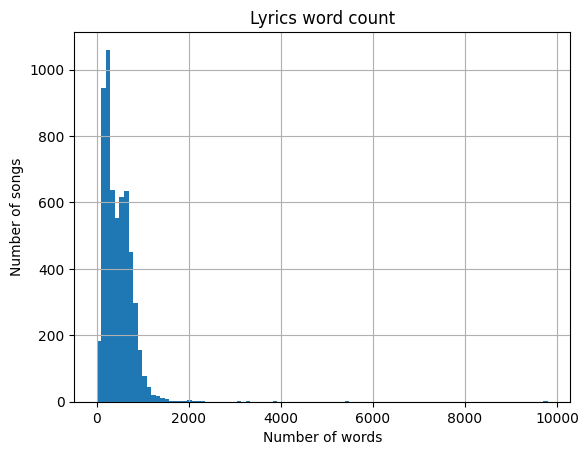

In [43]:
# plot histogram of lyrics word count
df_songs['LyricsWordCount'].hist(bins=100)
plt.title('Lyrics word count')
plt.xlabel('Number of words')
plt.ylabel('Number of songs')
plt.show()


In [44]:
# show artists of songs with less than 100 words
for index, row in df_songs.iterrows():
    if row['LyricsWordCount'] < 100:
        print(row['Artist'], row['Song'])
        

Big Pun Intermission Capital Punishment
Kraftwerk Metropolis
Kraftwerk Spacelab
Gift of Gab Intro Finding Inspiration Somehow
Def Leppard Switch 625
Kraftwerk Its More Fun to Compute
Kraftwerk Radioactivity Japanese Version  Houshanou
Megadeth Conquer or Die
Daft Punk Revolution 909
Eurythmics Monkey Monkey
Kraftwerk Neon Lights
Kraftwerk Boing Boom Tschak
Kraftwerk Computer World 2
Black Sabbath Sleeping Village
Anthrax Intro to Reality
Daft Punk WDPK 83.7 FM
Kraftwerk The ManMachine
Jimi Hendrix Drifting
Metallica To Live Is to Die
Kraftwerk Electric Café
Kraftwerk Neonlicht
Kraftwerk Home Computer
B.B. King Nobody Loves Me But My Mother
Hank Williams Ill Fly Away
Buddy Holly You Are My One Desire
Kraftwerk Vitamin
Daft Punk The Grid
Janis Joplin All Is Loneliness
Daft Punk Daft Punk Helmets Through The Ages Feature
Blondie Atomic
Fleetwood Mac Never Going Back Again
Lauryn Hill Intro
The Velvet Underground European Son
Frank Sinatra Autumn Leaves
Kraftwerk Musik Non Stop
Daft Punk M

/var/folders/6s/slt28qxd6zg11_5c2pz6clj40000gn/T/ipykernel_82230/2150824440.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))


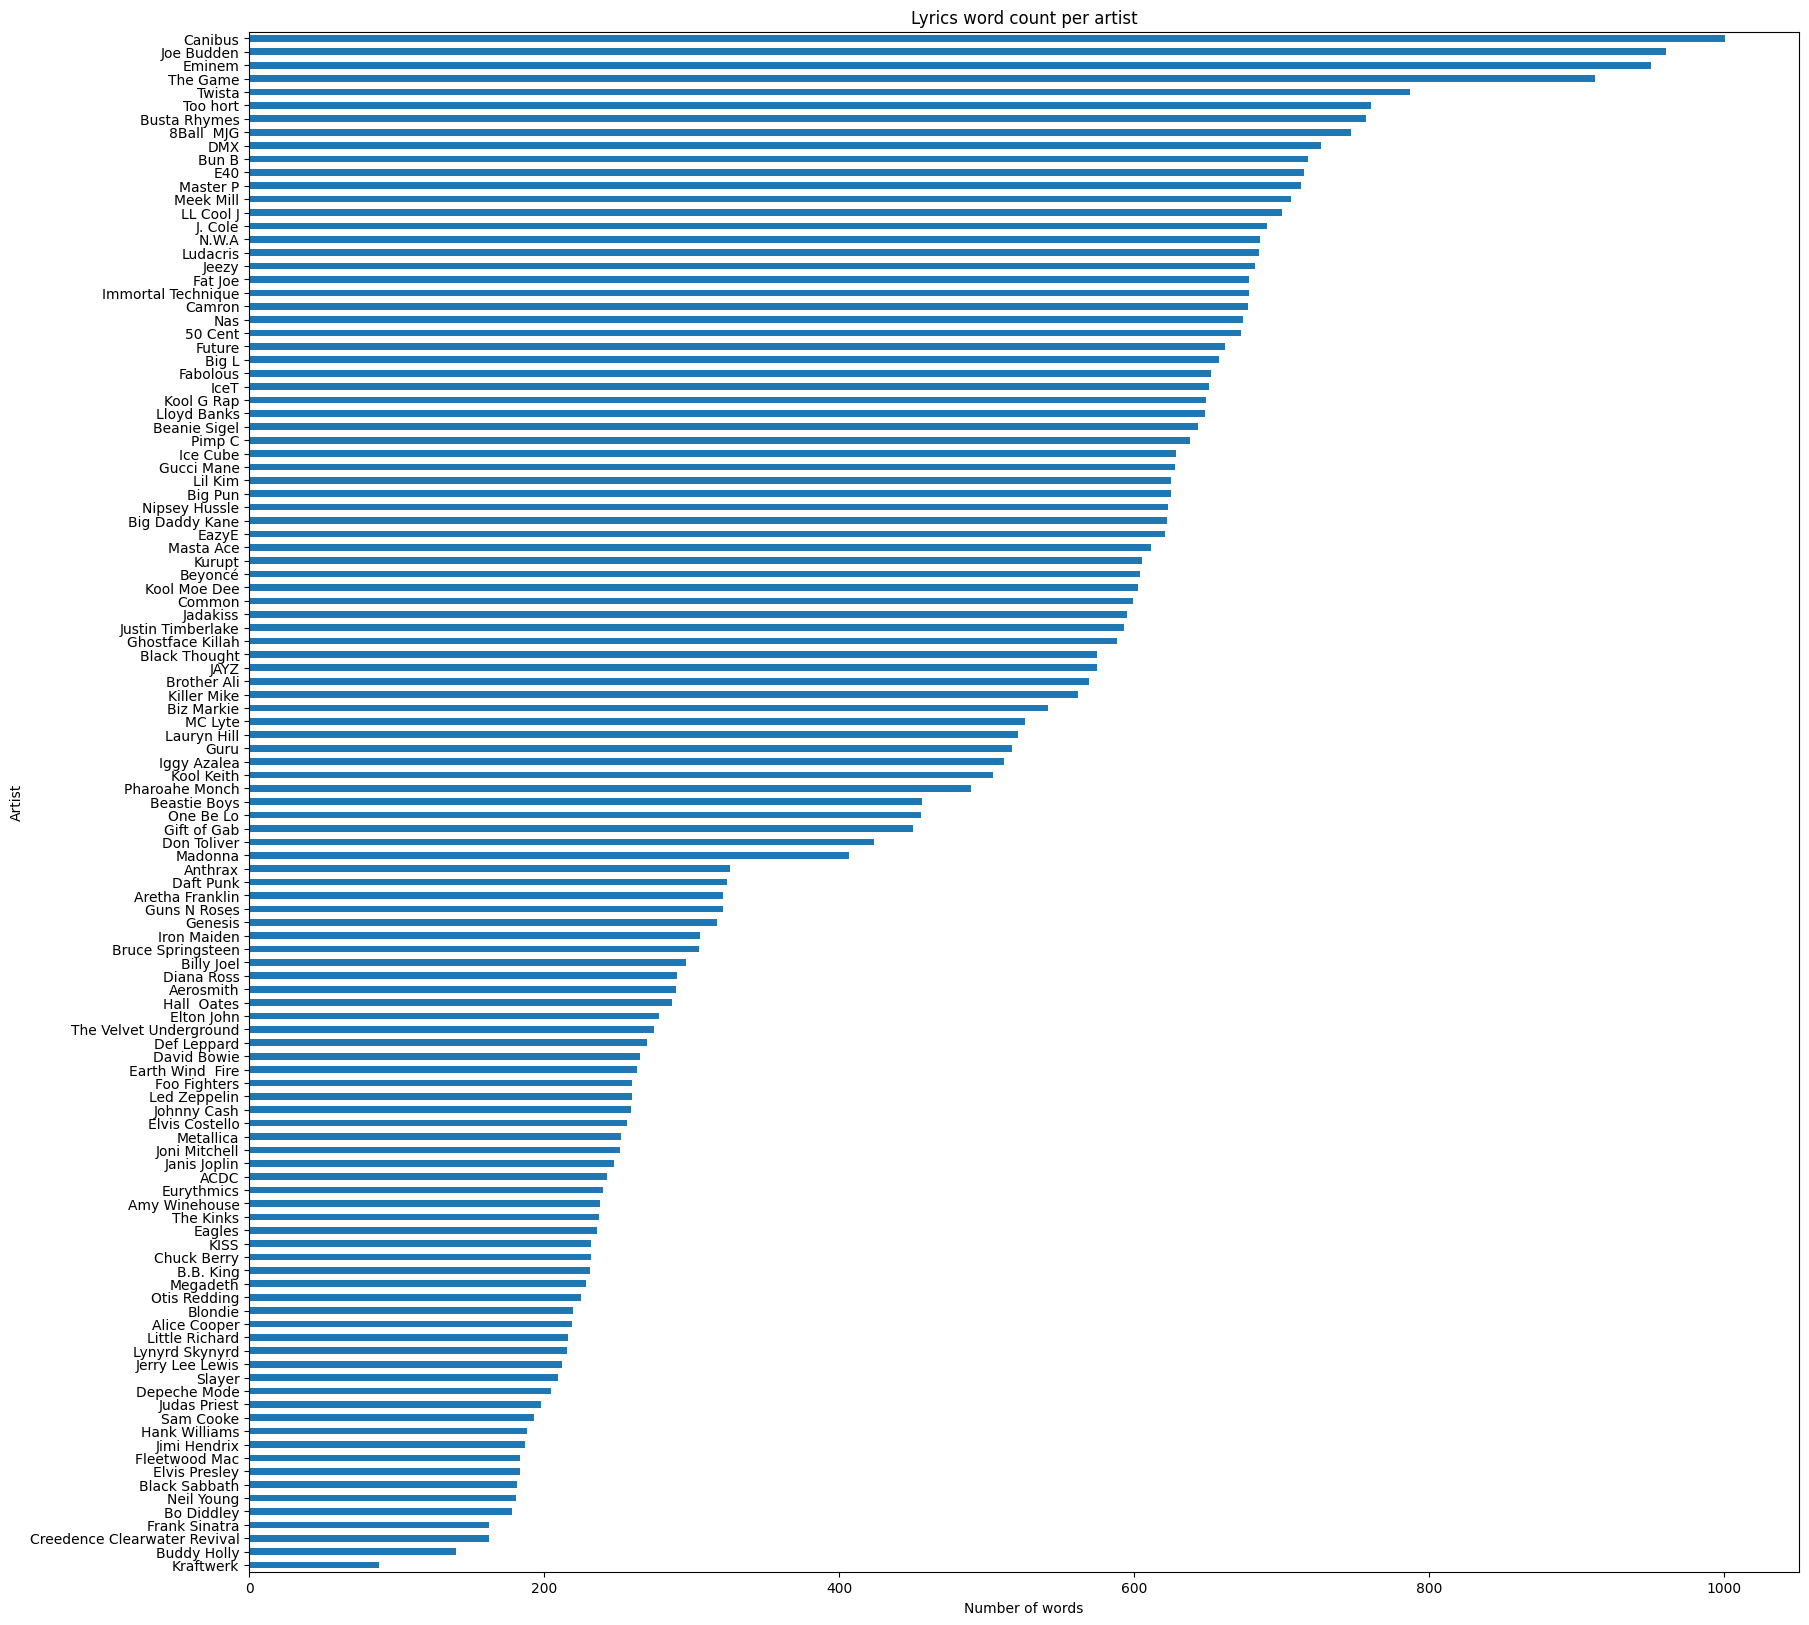

In [45]:
# plot lyrics word count per artist
df_songs.groupby('Artist').mean()['LyricsWordCount'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))
plt.title('Lyrics word count per artist')
plt.xlabel('Number of words')
plt.ylabel('Artist')
plt.show()

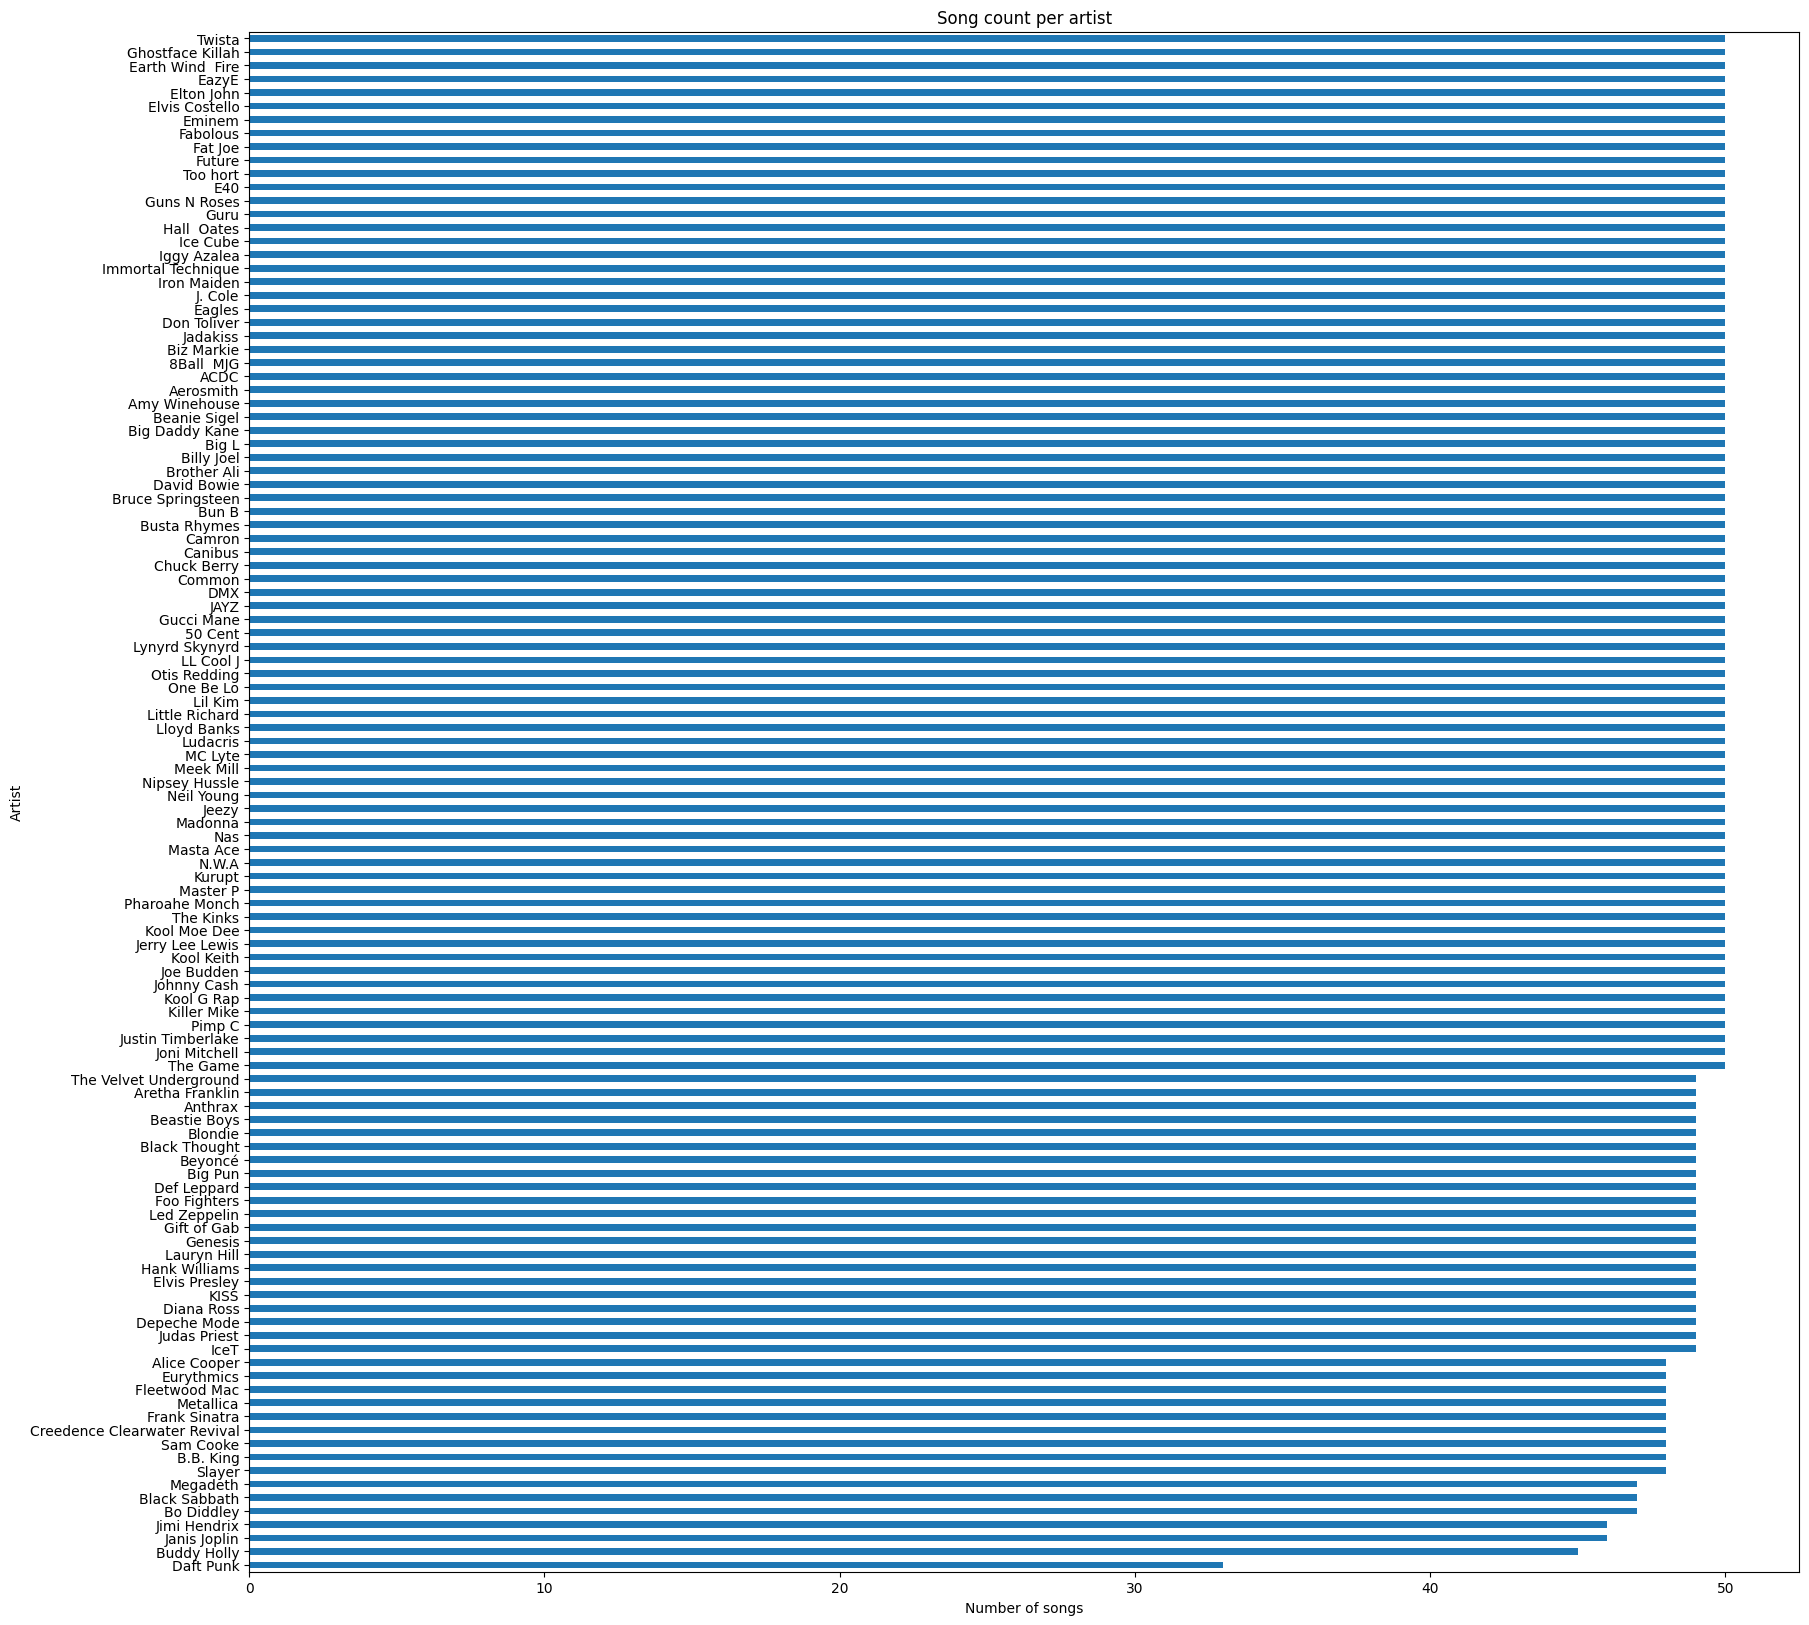

In [54]:
# plot song count per artist
df_songs.groupby('Artist').count()['Song'].sort_values(ascending=True).plot(kind='barh', figsize=(20, 20))
plt.title('Song count per artist')
plt.xlabel('Number of songs')
plt.ylabel('Artist')
plt.show()

In [46]:
# drop all songs with less than 80 words
df_songs = df_songs[df_songs['LyricsWordCount'] >= 80]

df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
2031,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
294,Kraftwerk,Europe Endless,Europe endless Endless endless endless endless...,80
997,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80
946,Elvis Presley,Blue Moon,Blue moon You saw me standing alone Without a ...,81
2818,The Velvet Underground,Ride Into the Sun Session Outtake,Ride Into the Sun Session Outtake Lyrics Looki...,81


In [47]:
# print number of lyrics per artist
df_songs.groupby('Artist').count()['Lyrics'].sort_values(ascending=True)

Artist
Kraftwerk           26
Daft Punk           33
Buddy Holly         45
Janis Joplin        46
Jimi Hendrix        46
                    ..
Elton John          50
EazyE               50
Earth Wind  Fire    50
Jeezy               50
Twista              50
Name: Lyrics, Length: 115, dtype: int64

In [48]:
# drop artists with less than 30 songs
for artist in df_songs['Artist'].unique():
    if len(df_songs[df_songs['Artist'] == artist]) < 30:
        df_songs = df_songs[df_songs['Artist'] != artist]

In [49]:
df_songs.head()

,Artist,Song,Lyrics,LyricsWordCount
2031,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
997,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80
946,Elvis Presley,Blue Moon,Blue moon You saw me standing alone Without a ...,81
2818,The Velvet Underground,Ride Into the Sun Session Outtake,Ride Into the Sun Session Outtake Lyrics Looki...,81
3045,The Velvet Underground,Jesus,Jesus help me find my proper place Jesus help ...,81


In [50]:
# print df-entry of longest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].max()]

,Artist,Song,Lyrics,LyricsWordCount
3958,Canibus,Poet Laureate Infinity,I got bored with 4 beats to the measure Profes...,9802


In [51]:
# print df-entry of shortest song
df_songs[df_songs['LyricsWordCount'] == df_songs['LyricsWordCount'].min()]

,Artist,Song,Lyrics,LyricsWordCount
2031,Jerry Lee Lewis,Goodnight Irene,Last Saturday night I got married Me and my wi...,80
997,Buddy Holly,Raining in My Heart,The sun is out The sky is blue Theres not a cl...,80


### Most used words

In [92]:
# get n most used words in lyrics from df
def getMostUsedWords(df, n):
    # get all words from lyrics
    words = ' '.join(df['Lyrics']).split()

    # create a dictionary with the words as keys and the number of times it appears as value
    wordsDict = {word: words.count(word) for word in words}

    # sort the dictionary by the values
    wordsDict = {k: v for k, v in sorted(wordsDict.items(), key=lambda item: item[1], reverse=True)}

    # get the first n words from the dictionary
    words = list(wordsDict.keys())[:n]

    # get the first n values from the dictionary
    values = list(wordsDict.values())[:n]

    # return the words and values
    return words, values

In [93]:
# mostUsed = getMostUsedWords(df_songs, 10)

---

## Export as csv

In [52]:
exportPath = './datasets/df_songs.csv'

In [53]:
# export dataframe to csv to path
df_songs.to_csv(exportPath, index=False)